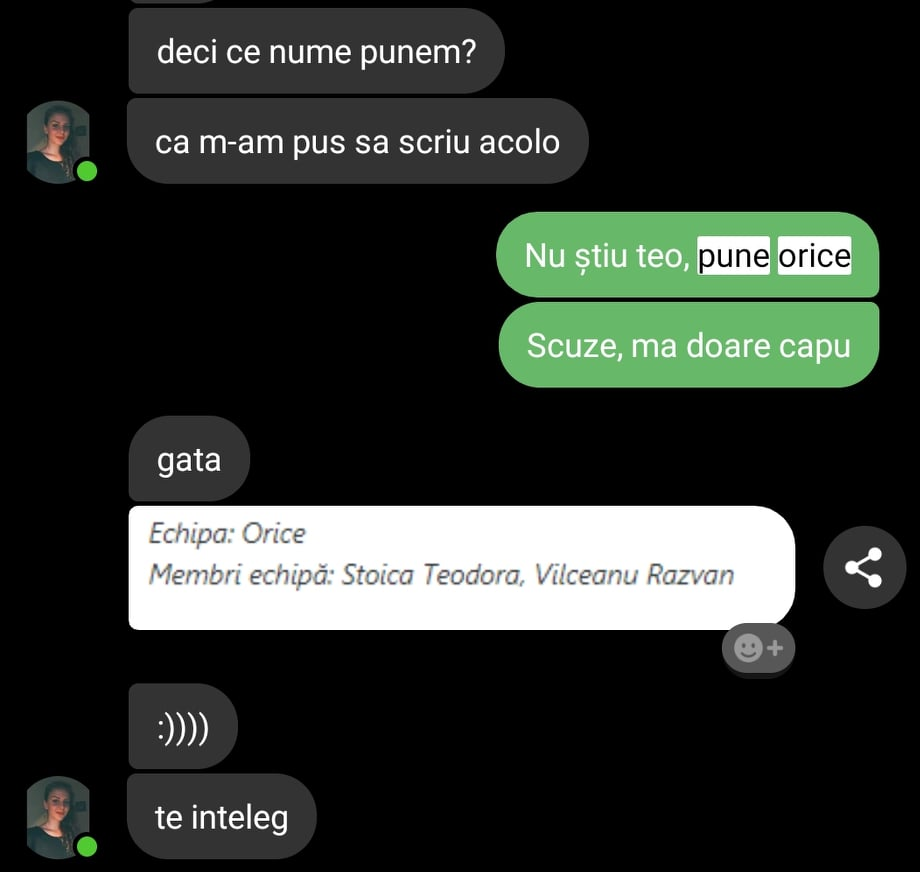

In [30]:
from IPython.display import Image
Image(filename='img.jpg', width=700, height=1000)

In [50]:
#incarcarea pachetelor necesare
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
from shapely import wkt
from folium.plugins import HeatMap
import folium
import missingno as msn
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
#incarcarea fisierelor necesare
bf=pd.read_csv('final.csv')
df=pd.read_csv('finalG.csv')
gdf=gpd.read_file('csv/neighbourhoods.geojson')

In [52]:
#transformarea datelor in formatele necesare
df['coordinates']=df['coordinates'].apply(wkt.loads)
df=gpd.GeoDataFrame(df, geometry='coordinates')

In [53]:
#adaugam pretul in fisierul principal
df['price']=bf['price']
df.head(1)

,Unnamed: 0,Unnamed: 0.1,id,name,reviews_per_month,neighbourhood,longitude,latitude,coordinates,price
0,0,0,15883,b&b near Old Danube river,0.18,Donaustadt,16.42812,48.24144,POINT (16.42812 48.24144),106.0


In [54]:
#ne asiguram ca datele sunt pregatite pentru reprezentarea grafica
type(df)

geopandas.geodataframe.GeoDataFrame

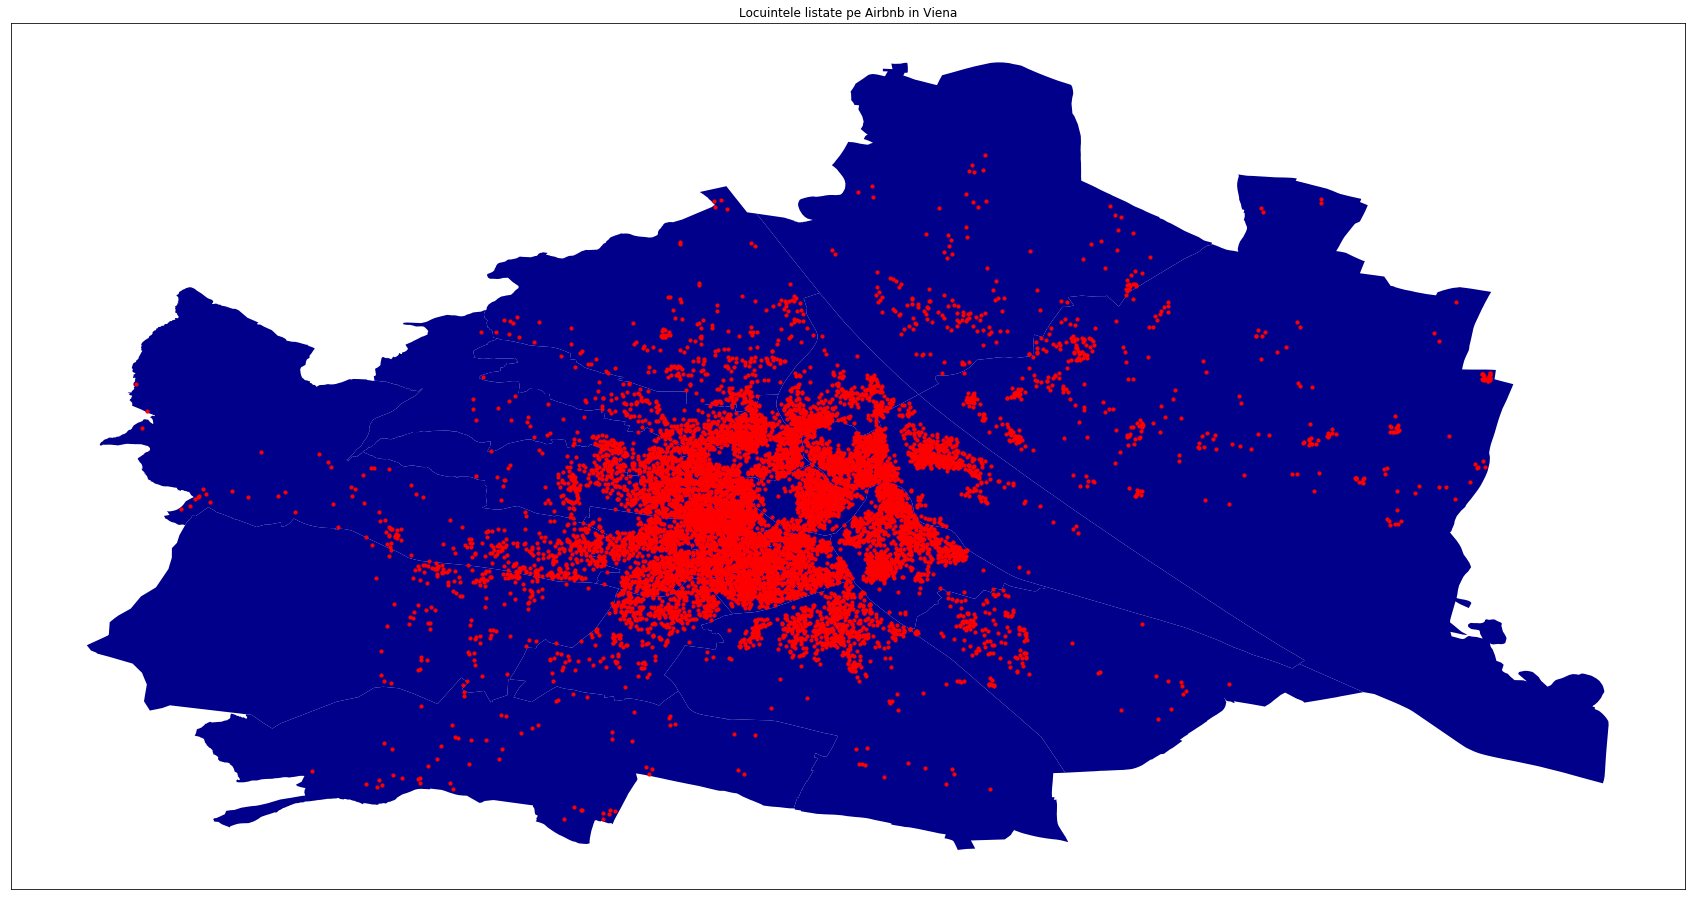

In [55]:
fig, ax=plt.subplots(1, figsize=(30,20))
bg=gdf['geometry'].plot(ax=ax, color='darkblue')
plt.title('Locuintele listate pe Airbnb in Viena')
plt.xticks([])
plt.yticks([])
df.plot(ax=bg, color='red', markersize=10)

In [56]:
maxprice=float(df['price'].max())
hmap=folium.Map(location=[48.2082,16.3738], zoom_start=11)
hm_wide=HeatMap(list(zip(df.latitude.values, df.longitude.values, df.price.values)),
                opacity=100,
                max_val=maxprice,
                radius=10,
                blur=15,
                max_zoom=1)
folium.GeoJson(gdf).add_to(hmap)
hmap.add_child(hm_wide)
#inspiratie:https://alcidanalytics.com/p/geographic-heatmap-in-python

In [57]:
#incarcam alte date
df1=pd.read_csv('prices_per_date.csv', parse_dates=['date'])
df1.head(1)

,listing_id,Unnamed: 0,date,price,minimum_nights
0,15883,0,2019-11-20,1.06,1


In [58]:
#scapam de coloanele ce nu sunt necesare
df1=df1.drop(['minimum_nights', 'Unnamed: 0'], axis=1)

In [61]:
#df1=df1.set_index('listing_id')
df1['price']=df1['price']*100
df1.head()

,date,price
listing_id,,
15883,2019-11-20,106.0
15883,2020-03-16,129.0
15883,2020-03-17,110.0
15883,2020-03-18,110.0
15883,2020-03-19,110.0


In [62]:
#generam datele pentru grafice
dt1=df1.loc[15883]
dt1=dt1.set_index('date')
dt2=df1.loc[536895]
dt2=dt2.set_index('date')
dt3=df1.loc[2165047]
dt3=dt3.set_index('date')

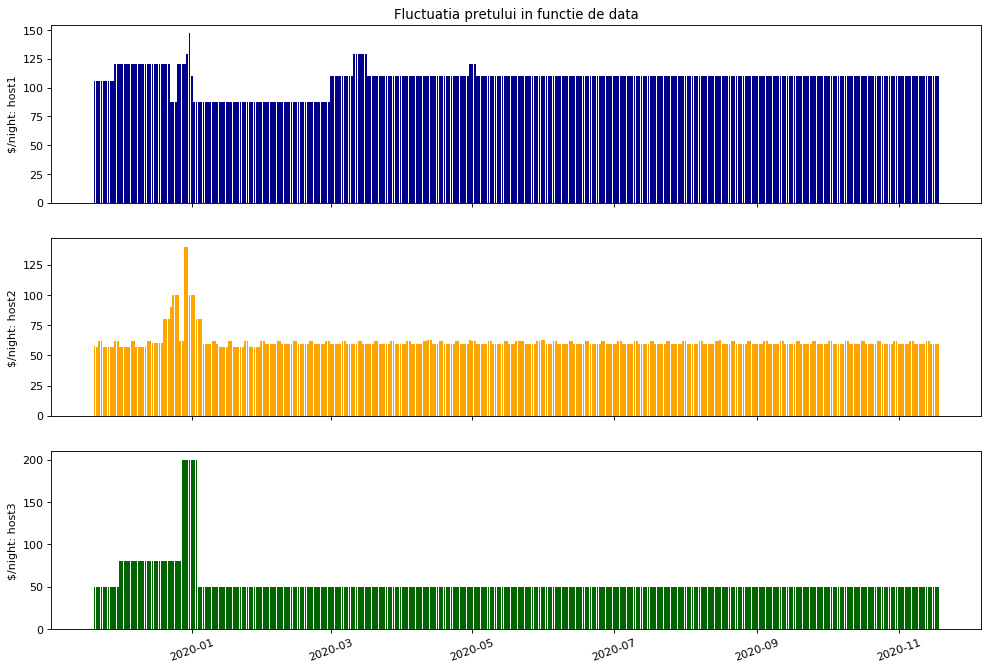

In [63]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(15,10), dpi=80, facecolor='w',edgecolor='k')
ax1=plt.subplot(311)
plt.title('Fluctuatia pretului in functie de data')
plt.ylabel('$/night: host1')
plt.bar(dt1.index, dt1.price, color='darkblue')
ax2=plt.subplot(312, sharex=ax1)
plt.ylabel('$/night: host2')
plt.bar(dt2.index, dt2.price, color='orange')
ax3=plt.subplot(313, sharex=ax1)
plt.ylabel('$/night: host3', rotation=90)
plt.bar(dt3.index, dt3.price,color='darkgreen')
plt.setp(ax2.get_xticklabels(), visible=False)
plt.setp(ax1.get_xticklabels(), visible=False)
plt.xticks(rotation=20)
plt.show()

In [64]:
#importam alte date
df2=pd.read_csv('final.csv')
df2.head()

,Unnamed: 0,id,name,reviews_per_month,neighbourhood,longitude,latitude,date,price,minimum_nights,number_of_reviews
0,0,15883,b&b near Old Danube river,0.18,Donaustadt,16.42812,48.24144,2019-11-20,106.0,1,10.0
1,1,38768,central cityapartement- wifi- nice neighbourhood,2.87,Leopoldstadt,16.37926,48.21823,2019-11-20,129.0,3,303.0
2,2,40625,"Near Palace Schönbrunn, Apt. 1",1.32,Rudolfsheim-Fünfhaus,16.32740,48.18486,2019-11-20,110.0,1,149.0
3,3,51287,little studio- next to citycenter- wifi- nice ...,2.62,Leopoldstadt,16.37781,48.21851,2019-11-20,110.0,3,281.0
4,4,70568,apartment2rent - UNO City - Danube,0.10,Donaustadt,16.42460,48.22224,2019-11-20,110.0,3,10.0


In [65]:
df2.groupby(['neighbourhood']).count()

,Unnamed: 0,id,name,reviews_per_month,longitude,latitude,date,price,minimum_nights,number_of_reviews
neighbourhood,,,,,,,,,,
Alsergrund,848,848,846,698,848,848,848,848,848,732
Brigittenau,476,476,476,389,476,476,476,476,476,408
Donaustadt,391,391,391,308,391,391,391,391,391,329
Döbling,300,300,299,251,300,300,300,300,300,266
Favoriten,672,672,672,583,672,672,672,672,672,507
Floridsdorf,149,149,149,124,149,149,149,149,149,122
Heitzing,160,160,159,128,160,160,160,160,160,140
Hernals,381,381,380,302,381,381,381,381,381,302
Innere Stadt,719,719,719,618,719,719,719,719,719,635


In [66]:
#grupam datele dupa cartiere
df2=df2.groupby(['neighbourhood']).count()
df2.head(1)

,Unnamed: 0,id,name,reviews_per_month,longitude,latitude,date,price,minimum_nights,number_of_reviews
neighbourhood,,,,,,,,,,
Alsergrund,848,848,846,698,848,848,848,848,848,732


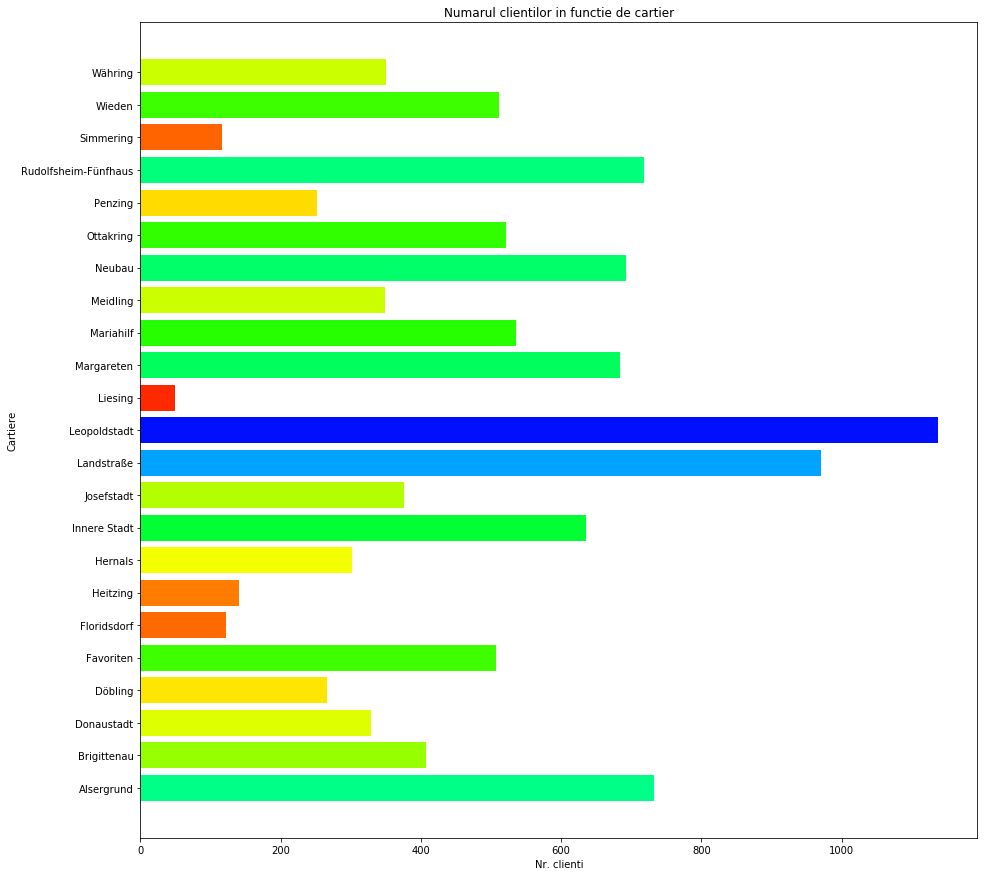

In [46]:
#reprezentam grafic numarul de clienti Airbnb din fiecare cartier
from matplotlib import cm
plt.figure(figsize=(15,15))
y=df2.number_of_reviews
x=df2.index
colors=cm.hsv(y / max(y*1.5))
plt.barh(x, y, color=colors)
plt.ylabel('Cartiere')
plt.xlabel('Nr. clienti')
plt.title('Numarul clientilor in functie de cartier')

plt.show()